In [1]:
import numpy as np 
import pandas as pd 
import librosa
import textgrids

In [3]:
FRAME_DURATION = 30
OVERLAP_RATE = 0.0

In [5]:
def readFile(path):
    '''
    Read the file and return the list of SPEECH/NONSPEECH labels for each frame
    '''

    labeled_list  = []
    grid = textgrids.TextGrid(path)

    for interval in grid['silences']:
        label = int(interval.text)

        dur = interval.dur
        dur_msec = dur * 1000 # sec -> msec
        num_frames = int(round(dur_msec /30)) # the audio is divided into 30 msec frames
        for i in range(num_frames):

            labeled_list.append(label)

    return labeled_list

In [7]:
column_names = [f'mfcc{i+1}' for i in range(12)]
column_names.extend(['zcr','rms','labels'])
df = pd.DataFrame(columns = column_names)
df

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,zcr,rms,labels


In [9]:
def addData(df, audio_path, annotation_path):
    data, fs = librosa.load(audio_path)
    label_list = readFile(annotation_path)
    label = np.array(label_list)
    Ns = len(data)  
    Ts = 1 / fs  
    t = np.arange(Ns) * 1000 * Ts  
    shift = 1 - OVERLAP_RATE
    frame_length = int(np.floor(FRAME_DURATION * fs / 1000))
    frame_shift = round(frame_length * shift)
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=frame_shift)
    rms_energy = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=frame_shift)
    mfccs = librosa.feature.mfcc(y=data, n_mfcc=12, hop_length=frame_shift, n_fft=frame_length)
    mfccs = mfccs.T
    zcr = zcr.T
    rms = rms_energy.T
    mini = label.shape[0]
    mini = min(mini,mfccs.shape[0])
    mini = min(mini,rms.shape[0])
    mini = min(mini,zcr.shape[0])
    combined_array = np.hstack((mfccs, zcr, rms))
    combined_array = combined_array[:mini]
    label = label[:mini]
    label = label.reshape(mini,1)
    d = np.hstack((combined_array,label))
    new_df = pd.DataFrame(d, columns = column_names)
    df = pd.concat([df, new_df], ignore_index=True)
    return new_df

In [69]:
import os


audio_directory = "Data/Data/Audio/Noizeus/Car"
annotation_directory = "Data/Data/Annotation/Noizeus/Car"
column_names = [f'mfcc{i+1}' for i in range(12)]
column_names.extend(['zcr','rms','labels'])
df = pd.DataFrame(columns = column_names)

audio_files = sorted([f for f in os.listdir(audio_directory) if f.endswith(('.mp3', '.wav', '.flac', '.aac', '.ogg', '.m4a'))])
annotation_files = sorted([f for f in os.listdir(annotation_directory) if f.endswith('.TextGrid')])  # Assume annotations are .txt files


for audio_file in audio_files:

    base_name = os.path.splitext(audio_file)[0]
    

    annotation_file = f"{base_name}.TextGrid"  

    # Construct full paths
    audio_path = os.path.join(audio_directory, audio_file)
    annotation_path = os.path.join(annotation_directory, annotation_file)

    # Check if the annotation file exists
    if os.path.exists(annotation_path):
        print(f"Audio: {audio_path}")
        print(f"Annotation: {annotation_path}")
        temp = addData(df,audio_path,annotation_path)
        df = pd.concat([df, temp], ignore_index=True)
    else:
        print(f"Warning: No annotation file found for {audio_file_path}")

Audio: Data/Data/Audio/Noizeus/Car\sp01_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp01_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp02_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp02_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp03_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp03_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp04_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp04_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp05_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp05_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp06_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp06_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp07_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp07_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp08_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp08_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp09_car_sn5.

C:\Users\nilay\AppData\Local\Temp\ipykernel_12064\3795589420.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)
C:\Users\nilay\AppData\Local\Temp\ipykernel_12064\3757801250.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


Audio: Data/Data/Audio/Noizeus/Car\sp15_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp15_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp16_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp16_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp17_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp17_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp18_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp18_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp19_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp19_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp20_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp20_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp21_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp21_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp22_car_sn5.wav
Annotation: Data/Data/Annotation/Noizeus/Car\sp22_car_sn5.TextGrid
Audio: Data/Data/Audio/Noizeus/Car\sp23_car_sn5.

In [70]:
dfna = df.dropna()
y = dfna['labels']
X = dfna.drop(columns = ['labels'])

In [71]:
Xr = np.array(X)
Xr.shape

(2668, 14)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42)

Epoch 1/50


D:\Acads\Semester 9\Thesis\Code\vad\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4024 - loss: 2.9973 - val_accuracy: 0.4005 - val_loss: 1.3976
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4267 - loss: 1.1129 - val_accuracy: 0.6089 - val_loss: 0.6754
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6430 - loss: 0.6348 - val_accuracy: 0.6323 - val_loss: 0.5956
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6262 - loss: 0.5880 - val_accuracy: 0.6393 - val_loss: 0.5818
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6473 - loss: 0.5609 - val_accuracy: 0.6511 - val_loss: 0.5704
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6765 - loss: 0.5514 - val_accuracy: 0.6792 - val_loss: 0.5592
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6903 - loss: 0.5473 - val_accuracy: 0.7073 - val_loss: 0.5482
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7046 - loss: 0.5372 - val_accuracy: 0.7237 - val_loss: 0.5372
Ep

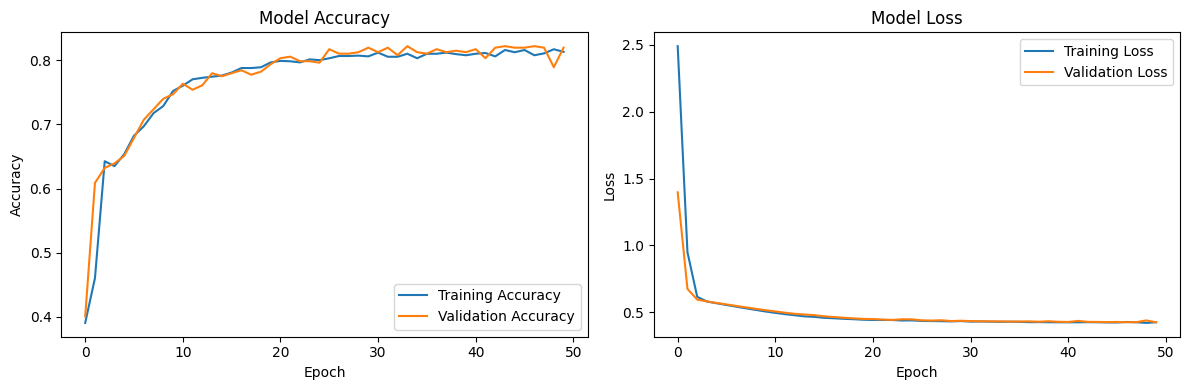

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

lstm = Sequential()
lstm.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1)))  # LSTM layer with 32 units
lstm.add(Dense(1, activation='sigmoid'))  # Fully connected layer for binary classification
opt = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    epsilon=1e-07,
    name='adam'
)
# Compile the model
lstm.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = lstm.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred = (lstm.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (using accuracy_score): {accuracy:.4f}")

# Plotting training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8108614232209738
Precision: 0.8107796344313198
FAR: 0.2170212765957447
FRR: 0.16722408026755853


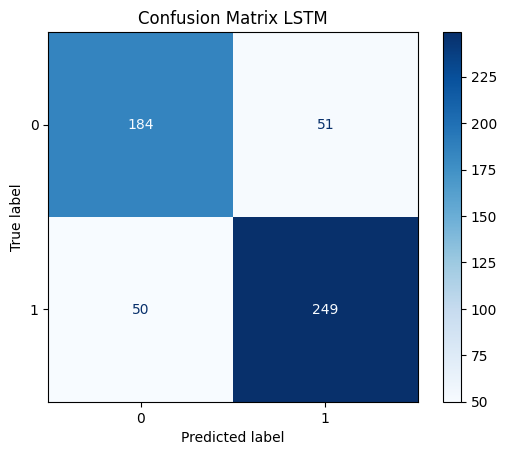

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = (lstm.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
far = cm[0][1]/(cm[0][0]+cm[0][1])
frr = cm[1][0]/(cm[1][0]+cm[1][1])
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"FAR: {far}")
print(f"FRR: {frr}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix LSTM")
plt.show()